# Exploratory Data Analysis (EDA)

In [12]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Import Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load Data

In [17]:
df = pd.read_csv("../data/Titanic-Dataset.csv")

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check NA Values

In [21]:
df[df.columns[1:]].isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Impute NA Values in Age Column with Median

In [22]:
df["Age"].fillna(df["Age"].median(), inplace=True)

In [23]:
df["Age"].isnull().sum()

0

## Fill Embarked with Mode

In [24]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)

In [25]:
df["Embarked"].isnull().sum()

0

## Survival Rates

### Sex

In [55]:
male_survived = df[(df["Sex"] == "male") & (df["Survived"] == 1)]["Survived"].count()
female_survived = df[(df["Sex"] == "female") & (df["Survived"] == 1)]["Survived"].count()

male_survival_rate = male_survived / df["Sex"].value_counts().values[0]
female_survival_rate = female_survived / df["Sex"].value_counts().values[1]

print("Male Survival Rate:", round(male_survival_rate, 2))
print("Female Survival Rate:", round(female_survival_rate, 2))

Male Survival Rate: 0.19
Female Survival Rate: 0.74


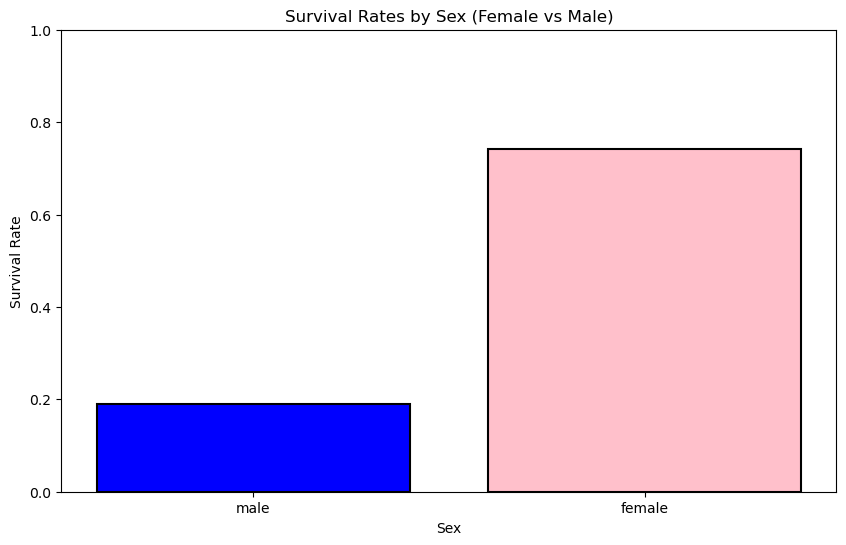

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(df["Sex"].value_counts().index, [male_survival_rate, female_survival_rate], color=['blue', 'pink'], linewidth=1.5, edgecolor='black')
plt.title("Survival Rates by Sex (Female vs Male)")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### Pclass

In [58]:
class_1_survived = df[(df["Pclass"] == 1) & (df["Survived"] == 1)]["Survived"].sum()
class_2_survived = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]["Survived"].sum()
class_3_survived = df[(df["Pclass"] == 3) & (df["Survived"] == 1)]["Survived"].sum()

class_1_survival_rate = class_1_survived / df["Pclass"].value_counts().sort_index().values[0]
class_2_survival_rate = class_2_survived / df["Pclass"].value_counts().sort_index().values[1]
class_3_survival_rate = class_3_survived / df["Pclass"].value_counts().sort_index().values[2]

print("1st Class Survival Rate:", round(class_1_survival_rate, 2))
print("2nd Class Survival Rate:", round(class_2_survival_rate, 2))
print("3rd Class Survival Rate:", round(class_3_survival_rate, 2))

1st Class Survival Rate: 0.63
2nd Class Survival Rate: 0.47
3rd Class Survival Rate: 0.24


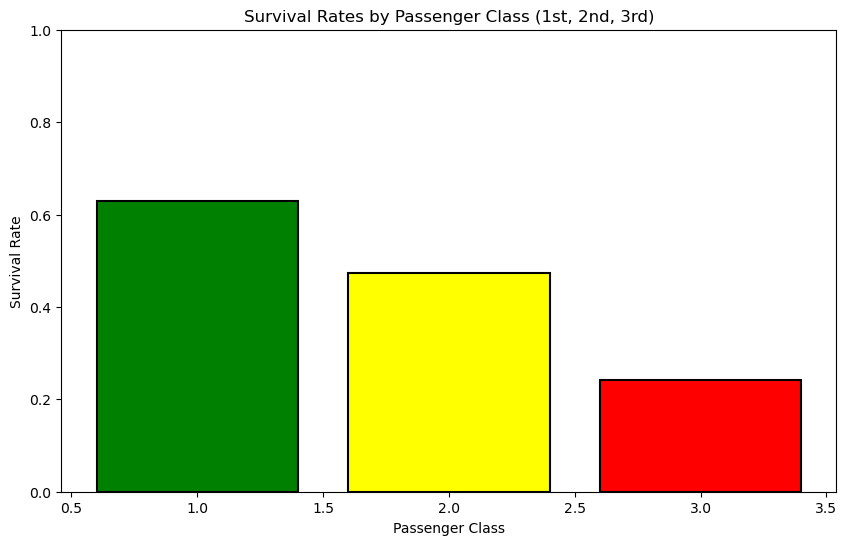

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(df["Pclass"].value_counts().sort_index().index, [class_1_survival_rate, class_2_survival_rate, class_3_survival_rate], color=['green', 'yellow', 'red'], linewidth=1.5, edgecolor='black')
plt.title("Survival Rates by Passenger Class (1st, 2nd, 3rd)")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

### Embarked

In [67]:
embarked_survival_rates = df.groupby("Embarked")["Survived"].mean()
print("Survival Rates by Embarked Port:")
print(embarked_survival_rates)

Survival Rates by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


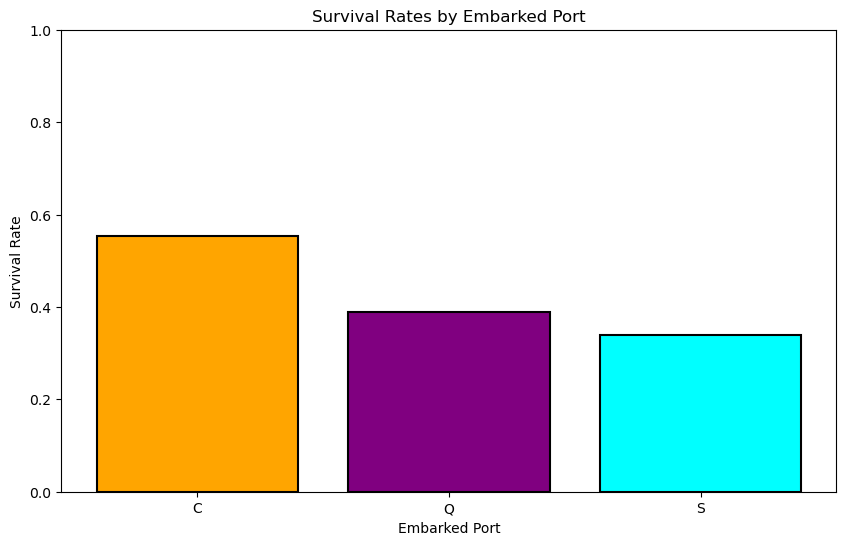

In [71]:
plt.figure(figsize=(10, 6))
plt.bar(embarked_survival_rates.index, embarked_survival_rates.values, color = ['orange', 'purple', 'cyan'], linewidth=1.5, edgecolor='black')
plt.title("Survival Rates by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

## Distributions

### Age

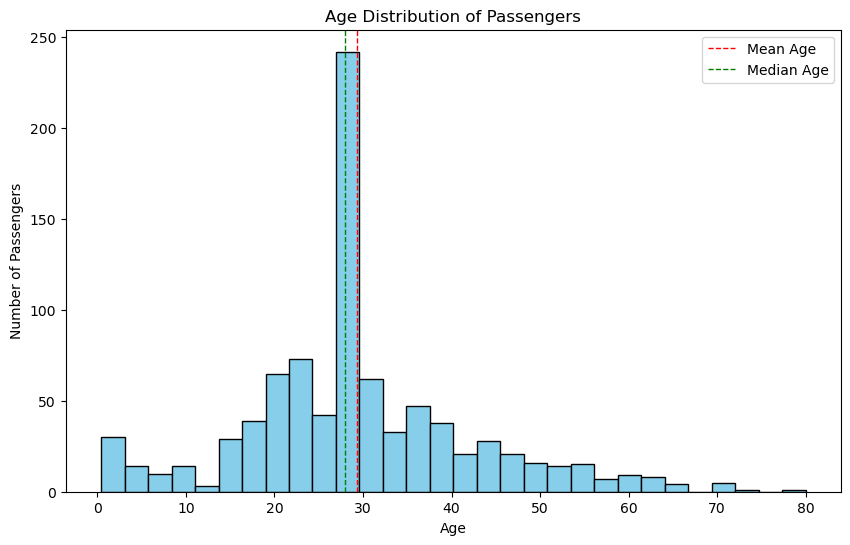

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.axvline(df["Age"].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Age')
plt.axvline(df["Age"].median(), color='green', linestyle='dashed', linewidth=1, label='Median Age')
plt.legend()
plt.show()

### Fare

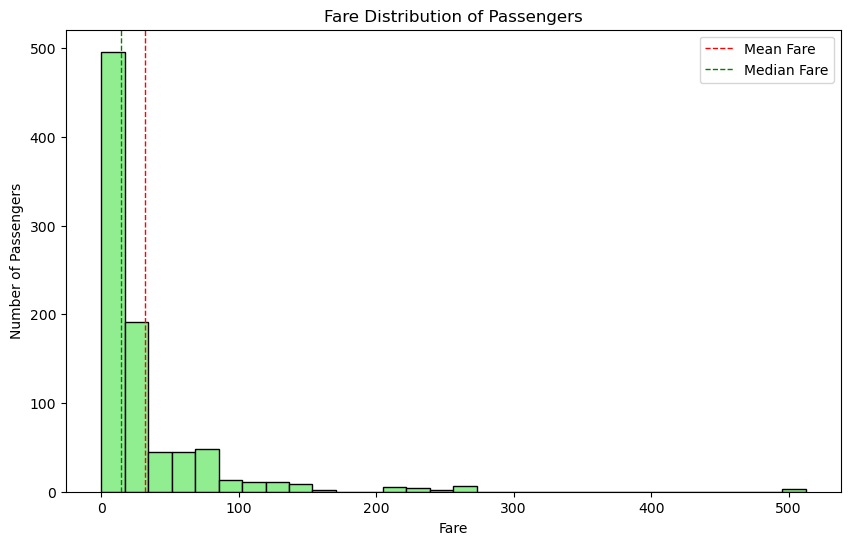

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(df["Fare"], bins=30, color='lightgreen', edgecolor='black')
plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.axvline(df["Fare"].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Fare')
plt.axvline(df["Fare"].median(), color='green', linestyle='dashed', linewidth=1, label='Median Fare')
plt.legend()
plt.show()

## Heatmap

### Missing Values

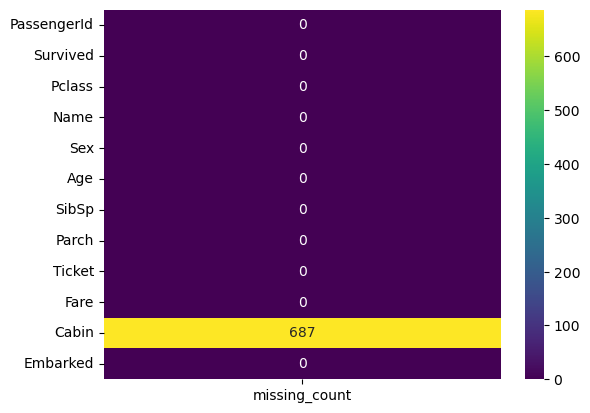

In [74]:
# Calculate missing values per column
missing_values = df.isnull().sum().to_frame(name='missing_count')

# Generate the heatmap
sns.heatmap(missing_values, annot=True, fmt="d", cmap='viridis')
plt.show()

### Correlation Matrix

In [80]:
df[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr(method='pearson').style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000
